## **Chapter 6: Data Loading, Storage, and File Formats**

**📥 Đọc dữ liệu và làm cho dữ liệu có thể truy cập được (data loading) là bước đầu tiên bắt buộc khi sử dụng hầu hết các công cụ trong cuốn sách này.**

- **Parsing** đôi khi cũng được dùng để mô tả việc nạp dữ liệu văn bản và diễn giải nó thành bảng và các kiểu dữ liệu khác nhau.

Nội dung ở đây tập trung vào **input và output với pandas**, dù thực tế còn rất nhiều thư viện khác hỗ trợ đọc/ghi dữ liệu ở nhiều định dạng khác nhau.

**📂 Các nhóm thao tác input/output phổ biến:**
- **Đọc file văn bản** (text files) và các định dạng lưu trữ hiệu quả hơn trên đĩa.

- **Nạp dữ liệu từ cơ sở dữ liệu** (databases).

- **Tương tác với các nguồn dữ liệu qua mạng** như **web APIs**.

### **6.1 Reading and Writing Data in Text Format**

##### **🗂️ Các hàm đọc dữ liệu văn bản và nhị phân trong pandas**

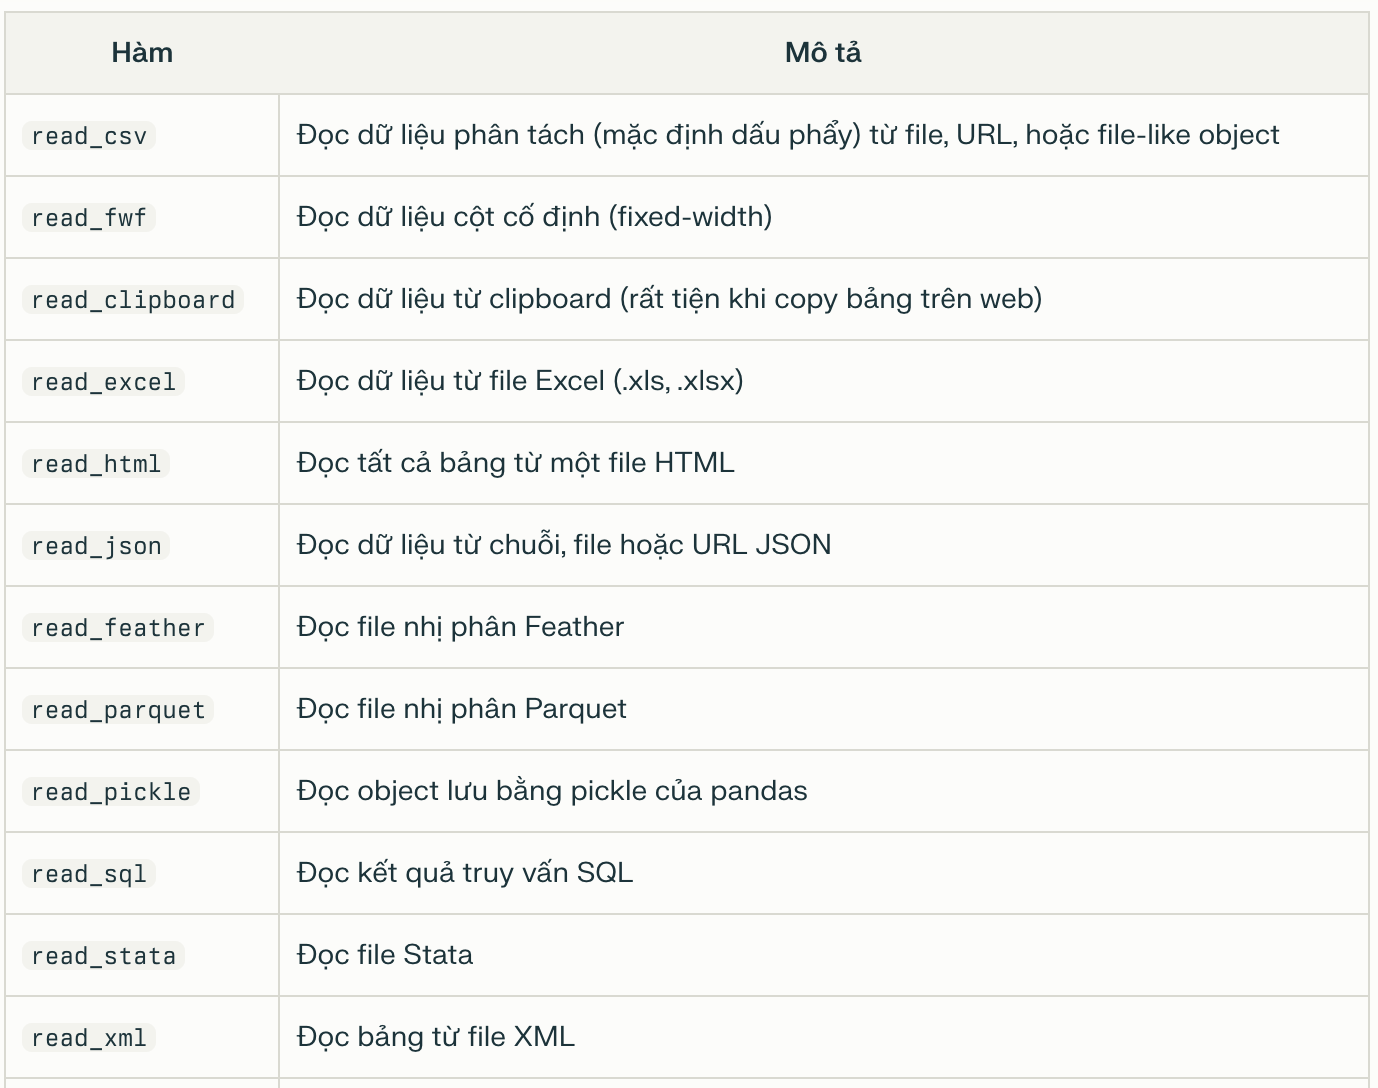

##### **🧩 Cách dùng cơ bản với ví dụ thực tế**

**Đọc file CSV có header:**

In [73]:
import pandas as pd

In [74]:
df = pd.read_csv("examples/ex1.csv")
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


-> pandas tự động nhận dòng đầu là tên cột (header).

**Đọc file không có header:**

In [75]:
pd.read_csv("examples/ex2.csv", header=None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


Hoặc đặt tên cột:

In [76]:
pd.read_csv("examples/ex2.csv", names=["a", "b", "c", "d", "message"])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


**Đặt cột làm index:**

In [77]:
names = ["a", "b", "c", "d", "message"]
pd.read_csv("examples/ex2.csv", names=names, index_col="message")

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


**Đọc file có nhiều cột làm index (MultiIndex):**

In [78]:
pd.read_csv("examples/csv_mindex.csv", index_col=["key1", "key2"])

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

**Đọc file phân tách bằng khoảng trắng:**

In [79]:
result = pd.read_csv("examples/ex3.txt", sep="\s+")
result

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/bg/hsvxykxj7yx0jz1nrhc3k6z40000gn/T/ipykernel_59748/1673285606.py:1: SyntaxWarning: invalid escape sequence '\s'
  result = pd.read_csv("examples/ex3.txt", sep="\s+")


,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


**Bỏ qua dòng đầu, dòng bất kỳ:**

**Ví dụ file có dòng chú thích hoặc dòng thừa:**

In [80]:
pd.read_csv("examples/ex4.csv", skiprows=[0, 2, 3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


- **`skiprows`**: Bỏ qua dòng đầu, dòng bất kỳ (theo số thứ tự dòng).

**Xử lý giá trị thiếu:**

- Mặc định pandas nhận diện **NA, NULL** là NaN.

- Có thể thêm giá trị thiếu riêng:

In [81]:
pd.read_csv("examples/ex5.csv", na_values=["NULL"])

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


**Tắt giá trị thiếu mặc định:**

In [82]:
pd.read_csv("examples/ex5.csv", keep_default_na=False)

,something,a,b,c,d,message
0,one,1,2,3,4,NA
1,two,5,6,,8,world
2,three,9,10,11,12,foo


**Đặt giá trị thiếu riêng cho từng cột:**

In [83]:
sentinels = {"message": ["foo", "NA"], "something": ["two"]}
pd.read_csv("examples/ex5.csv", na_values=sentinels, keep_default_na=False)

,something,a,b,c,d,message
0,one,1,2,3,4,NaN
1,NaN,5,6,,8,world
2,three,9,10,11,12,NaN


##### **Một số tham số quan trọng của pandas.read_csv**

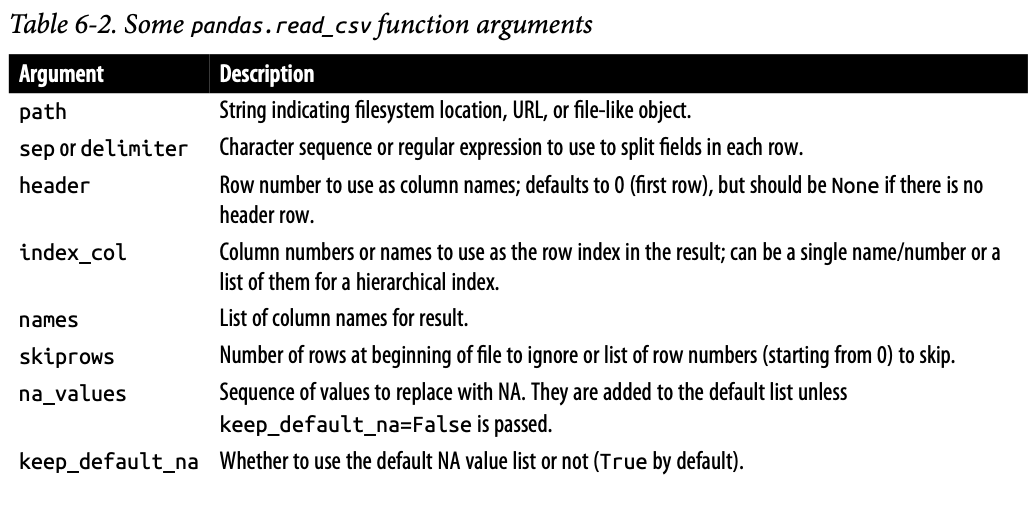
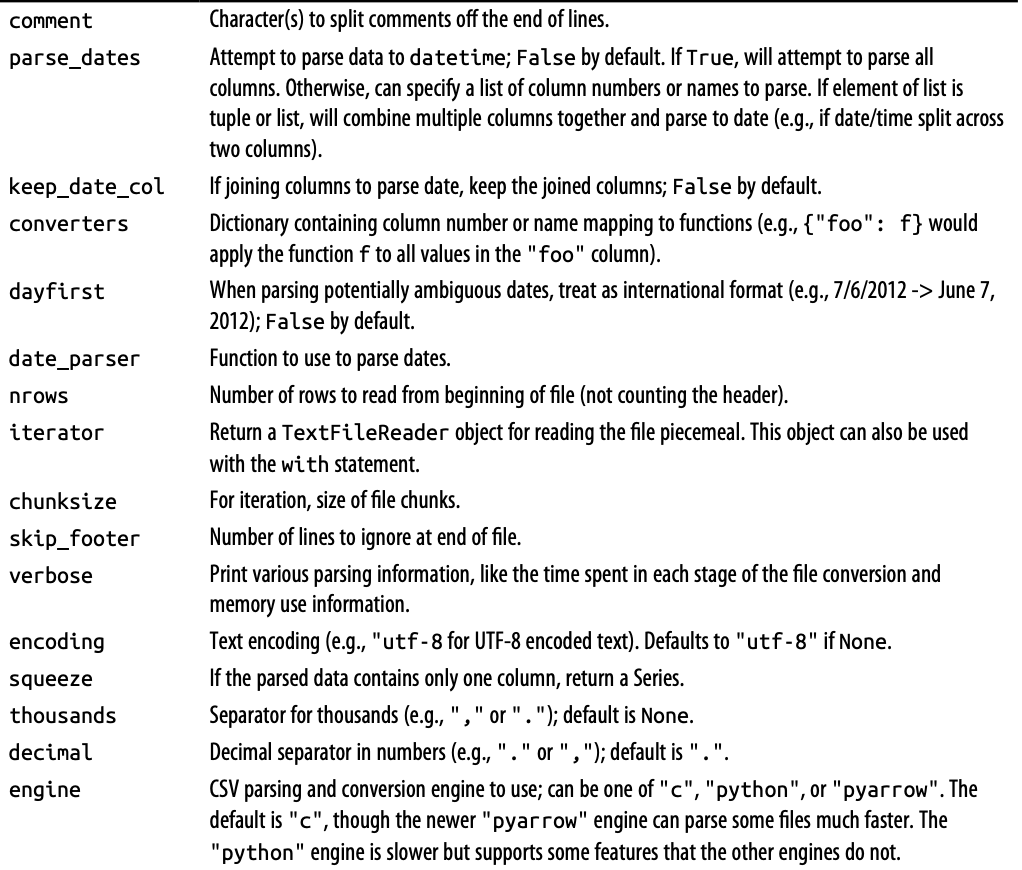

#### **Reading Text Files in Pieces**

##### **🧩 Đọc một phần nhỏ của file lớn**

- Khi làm việc với **file dữ liệu rất lớn**, bạn không cần (và không nên) đọc toàn bộ file vào bộ nhớ.
- pandas cho phép bạn chỉ đọc một **số dòng đầu** với tham số `nrows`:

In [84]:
df_small = pd.read_csv("examples/ex6.csv", nrows=5)
print(df_small)

        one       two     three      four key
0  0.467976 -0.038649 -0.295344 -1.824726   L
1 -0.358893  1.404453  0.704965 -0.200638   B
2 -0.501840  0.659254 -0.421691 -0.057688   G
3  0.204886  1.074134  1.388361 -0.982404   R
4  0.354628 -0.133116  0.283763 -0.837063   Q


-> Chỉ 5 dòng đầu tiên được nạp vào DataFrame.

##### **🗂️ Đọc file thành từng "miếng" (chunk)**

- Dùng tham số `chunksize` để đọc file thành từng khối nhỏ (ví dụ: mỗi lần 1000 dòng).
- Hàm trả về một **TextFileReader** (iterator), cho phép bạn **duyệt từng phần** của file mà không tốn nhiều RAM.

In [85]:
chunker = pd.read_csv("examples/ex6.csv", chunksize=1000)
print(type(chunker))

<class 'pandas.io.parsers.readers.TextFileReader'>


**Duyệt từng chunk:**

In [86]:
for piece in chunker:
    # Xử lý từng phần dữ liệu ở đây
    print(piece.shape)

(1000, 5)
(1000, 5)
(1000, 5)
(1000, 5)
(1000, 5)
(1000, 5)
(1000, 5)
(1000, 5)
(1000, 5)
(1000, 5)


##### **🔍 Ví dụ: Đếm tần suất giá trị trong cột "key" trên file lớn**

In [87]:
tot = pd.Series([], dtype='int64')
chunker = pd.read_csv("examples/ex6.csv", chunksize=1000)

for piece in chunker:
    tot = tot.add(piece["key"].value_counts(), fill_value=0)

tot = tot.sort_values(ascending=False)
print(tot[:10])

key
E    368.0
X    364.0
L    346.0
O    343.0
Q    340.0
M    338.0
J    337.0
F    335.0
K    334.0
H    330.0
dtype: float64


-> Hiển thị 10 giá trị xuất hiện nhiều nhất trong cột "key" trên toàn bộ file, mà không cần nạp hết dữ liệu vào bộ nhớ.

##### **⚙️ Đọc linh hoạt với `get_chunk()`**

Đối tượng **TextFileReader** còn có phương thức `get_chunk(n)` để đọc từng phần với kích thước tùy ý:

In [88]:
reader = pd.read_csv("examples/ex6.csv", chunksize=1000)
chunk = reader.get_chunk(500)  # Đọc 500 dòng tiếp theo

**💡 Lưu ý**
- Đọc file theo từng phần giúp tiết kiệm bộ nhớ, phù hợp với file rất lớn hoặc khi bạn chỉ cần xử lý một phần dữ liệu.

- Có thể kết hợp với các thao tác tổng hợp, lọc, hoặc ghi ra file khác theo từng chunk.

#### **Writing Data to Text Format**

##### **📝 Ghi DataFrame ra file CSV**

Sử dụng phương thức `to_csv()` để xuất dữ liệu từ DataFrame ra file dạng phân tách (thường là CSV).

In [89]:
data = pd.read_csv("examples/ex5.csv")
data

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [90]:
data.to_csv("examples/out.csv")

In [91]:
!cat examples/out.csv

,something,a,b,c,d,message
0,one,1,2,3.0,4,
1,two,5,6,,8,world
2,three,9,10,11.0,12,foo


##### **🔧 Tùy chỉnh dấu phân tách**

Có thể đổi dấu phân tách bằng tham số `sep`:

In [92]:
import sys
data.to_csv(sys.stdout, sep="|")

|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo


##### **❓ Tùy chỉnh giá trị thiếu (NaN)**

Mặc định giá trị thiếu là chuỗi rỗng. Có thể thay đổi bằng `na_rep`:

In [93]:
data.to_csv(sys.stdout, na_rep="NULL")

,something,a,b,c,d,message
0,one,1,2,3.0,4,NULL
1,two,5,6,NULL,8,world
2,three,9,10,11.0,12,foo


##### **🏷️ Tùy chỉnh ghi index và header**

**Ghi không có index và header:**

In [94]:
data.to_csv(sys.stdout, index=False, header=False)

one,1,2,3.0,4,
two,5,6,,8,world
three,9,10,11.0,12,foo


##### **📑 Ghi một phần cột, sắp xếp tùy ý**

Chỉ ghi một số cột nhất định, theo thứ tự mong muốn:

In [95]:
data.to_csv(sys.stdout, index=False, columns=["a", "b", "c"])

a,b,c
1,2,3.0
5,6,
9,10,11.0


#### **Working with Other Delimited Formats**

Pandas có thể đọc hầu hết các tệp dạng bảng bằng hàm `pd.read_csv`. Tuy nhiên, với một số tệp bị lỗi định dạng, bạn có thể phải xử lý thủ công.

##### **🔹 Đọc tệp CSV đơn giản với Python csv module**

Ví dụ tệp CSV nhỏ:

In [96]:
"a","b","c"
"1","2","3"
"1","2","3"

('1', '2', '3')

Bạn có thể đọc nó bằng thư viện csv tích hợp sẵn của Python:

In [97]:
import csv

with open("examples/ex7.csv") as f:
    reader = csv.reader(f)
    for line in reader:
        print(line)

['a', 'b', 'c']
['1', '2', '3']
['1', '2', '3']


-> Kết quả: mỗi dòng được tách thành danh sách và bỏ dấu ngoặc kép.

##### **🔹 Biến dữ liệu thành dạng từ điển**

In [98]:
with open("examples/ex7.csv") as f:
    lines = list(csv.reader(f))     # Đọc toàn bộ nội dung
header, values = lines[0], lines[1:]
data_dict = {h: v for h, v in zip(header, zip(*values))}  # Chuyển hàng thành cột

In [99]:
data_dict

{'a': ('1', '1'), 'b': ('2', '2'), 'c': ('3', '3')}

##### **🔹 Tuỳ chỉnh định dạng CSV với csv.Dialect**

Bạn có thể tạo subclass để tuỳ chỉnh cách đọc CSV:

In [100]:
class MyDialect(csv.Dialect):
    delimiter = ";"
    lineterminator = "\n"
    quotechar = '"'
    quoting = csv.QUOTE_MINIMAL

with open("examples/ex7.csv") as f:
    reader = csv.reader(f, dialect=MyDialect)
    for line in reader:
        print(line)

['a,"b","c"']
['1,"2","3"']
['1,"2","3"']


In [101]:
with open("examples/ex7.csv") as f:
	reader = csv.reader(f, delimiter="|")
	for line in reader:
		print(line)

['a,"b","c"']
['1,"2","3"']
['1,"2","3"']


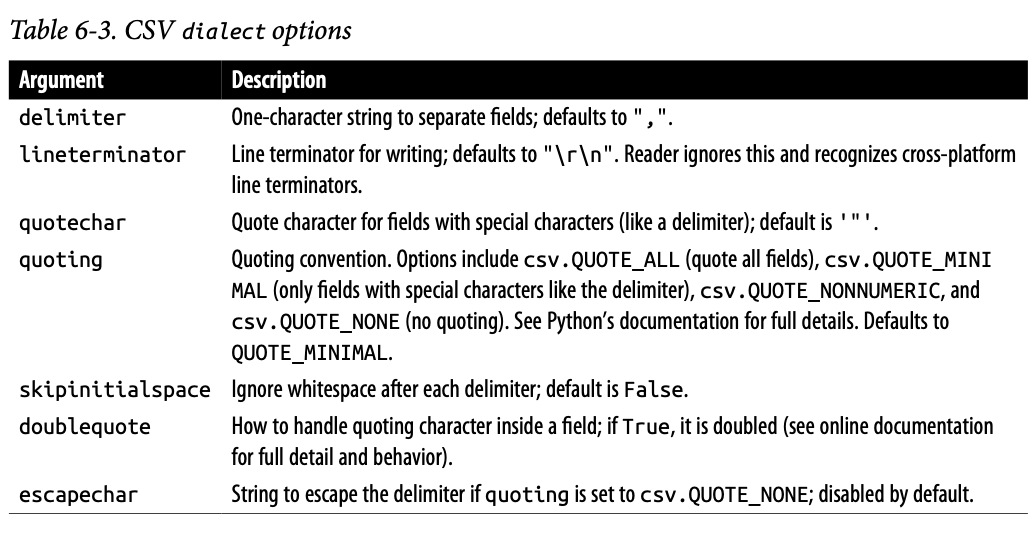

##### **🔹 Khi CSV quá phức tạp?**

Nếu tệp có phân cách nhiều ký tự hoặc phức tạp, không dùng được csv, bạn nên:
- Dùng `str.split()` hoặc `re.split()` để tách thủ công
- **Hoặc tốt nhất:** dùng pandas.read_csv() với các tuỳ chọn phù hợp

##### **✍️ Ghi tệp CSV thủ công**

In [102]:
with open("file_created/mydata.csv", "w") as f:
    writer = csv.writer(f, delimiter=";")
    writer.writerow(("one", "two", "three"))
    writer.writerow(("1", "2", "3"))

#### **JSON Data**

JSON (JavaScript Object Notation) là định dạng phổ biến để trao đổi dữ liệu qua HTTP giữa trình duyệt và ứng dụng. Khác với CSV dạng bảng, JSON có cấu trúc linh hoạt hơn, gần giống cú pháp Python.

Ví dụ JSON:

In [103]:
obj = """
{
  "name": "Wes",
  "pet": null,
  "cities_lived": ["Akron", "Nashville", "New York", "San Francisco"],
  "siblings": [
    {"name": "Scott", "age": 34, "hobbies": ["guitars", "soccer"]},
    {"name": "Katie", "age": 42, "hobbies": ["diving", "art"]}
  ]
}
"""

##### **Đọc và ghi JSON trong Python**

**Chuyển từ JSON sang Python**

In [104]:
import json

result = json.loads(obj)  # obj là chuỗi JSON
result

{'name': 'Wes',
 'pet': None,
 'cities_lived': ['Akron', 'Nashville', 'New York', 'San Francisco'],
 'siblings': [{'name': 'Scott', 'age': 34, 'hobbies': ['guitars', 'soccer']},
  {'name': 'Katie', 'age': 42, 'hobbies': ['diving', 'art']}]}

**Chuyển ngược từ Python sang JSON**

In [105]:
asjson = json.dumps(result)

##### **Phân tích JSON với pandas**

Nếu dữ liệu là danh sách dict (tương tự nhiều JSON object), có thể dùng `pd.DataFrame` để tạo bảng:

In [106]:
import pandas as pd

siblings = pd.DataFrame(result["siblings"], columns=["name", "age"])
siblings

,name,age
0,Scott,34
1,Katie,42


##### **Đọc tệp JSON bằng pandas**

In [107]:
data = pd.read_json("examples/example.json")
data

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


##### **Xuất dữ liệu từ pandas sang JSON**

In [108]:
import sys
data.to_json(sys.stdout)  # Xuất dạng mặc định

{"a":{"0":1,"1":4,"2":7},"b":{"0":2,"1":5,"2":8},"c":{"0":3,"1":6,"2":9}}

In [109]:
data.to_json(sys.stdout, orient="records")  # Xuất dạng danh sách bản ghi

[{"a":1,"b":2,"c":3},{"a":4,"b":5,"c":6},{"a":7,"b":8,"c":9}]

#### **XML and HTML: Web Scraping**

##### **✅ Phân tích HTML: Web Scraping với `pandas.read_html()`**

**🔧 Cài đặt thư viện hỗ trợ**

Nếu dùng conda:

In [110]:
# conda install lxml beautifulsoup4 html5lib

Nếu dùng pip:

In [111]:
pip install lxml beautifulsoup4 html5lib

DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/PyEyeTrack-1.0.1-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


**📄 Đọc dữ liệu từ HTML**

In [112]:
import pandas as pd

tables = pd.read_html("examples/fdic_failed_bank_list.html")  # Đọc tất cả bảng trong HTML
failures = tables[0]  # Lấy bảng đầu tiên
print(failures.head())

                      Bank Name             City  ST   CERT  \
0                   Allied Bank         Mulberry  AR     91   
1  The Woodbury Banking Company         Woodbury  GA  11297   
2        First CornerStone Bank  King of Prussia  PA  35312   
3            Trust Company Bank          Memphis  TN   9956   
4    North Milwaukee State Bank        Milwaukee  WI  20364   

                 Acquiring Institution        Closing Date       Updated Date  
0                         Today's Bank  September 23, 2016  November 17, 2016  
1                          United Bank     August 19, 2016  November 17, 2016  
2  First-Citizens Bank & Trust Company         May 6, 2016  September 6, 2016  
3           The Bank of Fayette County      April 29, 2016  September 6, 2016  
4  First-Citizens Bank & Trust Company      March 11, 2016      June 16, 2016  


**📊 Phân tích dữ liệu**

In [113]:
close_timestamps = pd.to_datetime(failures["Closing Date"])
print(close_timestamps.dt.year.value_counts())  # Đếm số ngân hàng đóng cửa theo năm

Closing Date
2010    157
2009    140
2011     92
2012     51
2008     25
2013     24
2014     18
2002     11
2015      8
2016      5
2004      4
2001      4
2007      3
2003      3
2000      2
Name: count, dtype: int64


##### **✅ Phân tích XML: Dữ liệu phân cấp**

**📥 Cách đọc XML thủ công với lxml.objectify**

In [114]:
from lxml import objectify

with open("datasets/mta_perf/Performance_MNR.xml") as f:
    parsed = objectify.parse(f)
root = parsed.getroot()
root

<Element PERFORMANCE at 0x128330a80>

**📌 Lấy dữ liệu từ các thẻ <INDICATOR>** 

In [115]:
data = []
skip_fields = ["PARENT_SEQ", "INDICATOR_SEQ", "DESIRED_CHANGE", "DECIMAL_PLACES"]

for elt in root.INDICATOR:
    el_data = {}
    for child in elt.getchildren():
        if child.tag in skip_fields:
            continue
        el_data[child.tag] = child.pyval
    data.append(el_data)

import pandas as pd
perf = pd.DataFrame(data)
print(perf.head())

            AGENCY_NAME                        INDICATOR_NAME  \
0  Metro-North Railroad  On-Time Performance (West of Hudson)   
1  Metro-North Railroad  On-Time Performance (West of Hudson)   
2  Metro-North Railroad  On-Time Performance (West of Hudson)   
3  Metro-North Railroad  On-Time Performance (West of Hudson)   
4  Metro-North Railroad  On-Time Performance (West of Hudson)   

                                         DESCRIPTION  PERIOD_YEAR  \
0  Percent of commuter trains that arrive at thei...         2008   
1  Percent of commuter trains that arrive at thei...         2008   
2  Percent of commuter trains that arrive at thei...         2008   
3  Percent of commuter trains that arrive at thei...         2008   
4  Percent of commuter trains that arrive at thei...         2008   

   PERIOD_MONTH            CATEGORY FREQUENCY INDICATOR_UNIT YTD_TARGET  \
0             1  Service Indicators         M              %       95.0   
1             2  Service Indicators         

**✅ Cách nhanh hơn: `pandas.read_xml()`** 

In [116]:
perf2 = pd.read_xml("datasets/mta_perf/Performance_MNR.xml")
print(perf2.head())

   INDICATOR_SEQ  PARENT_SEQ           AGENCY_NAME  \
0          28445         NaN  Metro-North Railroad   
1          28445         NaN  Metro-North Railroad   
2          28445         NaN  Metro-North Railroad   
3          28445         NaN  Metro-North Railroad   
4          28445         NaN  Metro-North Railroad   

                         INDICATOR_NAME  \
0  On-Time Performance (West of Hudson)   
1  On-Time Performance (West of Hudson)   
2  On-Time Performance (West of Hudson)   
3  On-Time Performance (West of Hudson)   
4  On-Time Performance (West of Hudson)   

                                         DESCRIPTION  PERIOD_YEAR  \
0  Percent of commuter trains that arrive at thei...         2008   
1  Percent of commuter trains that arrive at thei...         2008   
2  Percent of commuter trains that arrive at thei...         2008   
3  Percent of commuter trains that arrive at thei...         2008   
4  Percent of commuter trains that arrive at thei...         2008   

 

**Lưu ý:** `pandas.read_xml()` hoạt động tốt với XML đơn giản. Nếu bạn cần chọn dữ liệu cụ thể hơn (ví dụ: chỉ lấy một vài trường nhất định), hãy tham khảo docstring:

In [117]:
help(pd.read_xml)

Help on function read_xml in module pandas.io.xml:

read_xml(path_or_buffer: 'FilePath | ReadBuffer[bytes] | ReadBuffer[str]', *, xpath: 'str' = './*', namespaces: 'dict[str, str] | None' = None, elems_only: 'bool' = False, attrs_only: 'bool' = False, names: 'Sequence[str] | None' = None, dtype: 'DtypeArg | None' = None, converters: 'ConvertersArg | None' = None, parse_dates: 'ParseDatesArg | None' = None, encoding: 'str | None' = 'utf-8', parser: 'XMLParsers' = 'lxml', stylesheet: 'FilePath | ReadBuffer[bytes] | ReadBuffer[str] | None' = None, iterparse: 'dict[str, list[str]] | None' = None, compression: 'CompressionOptions' = 'infer', storage_options: 'StorageOptions | None' = None, dtype_backend: 'DtypeBackend | lib.NoDefault' = <no_default>) -> 'DataFrame'
    Read XML document into a :class:`~pandas.DataFrame` object.

    .. versionadded:: 1.3.0

    Parameters
    ----------
    path_or_buffer : str, path object, or file-like object
        String, path object (implementing ``os

### **6.2 Binary Data Formats**

**✅ Định dạng pickle**

- **pickle** là mô-đun có sẵn trong Python, dùng để **lưu trữ dữ liệu dưới dạng nhị phân** (binary) – tức là lưu cả cấu trúc đối tượng chứ không chỉ là văn bản.
- Trong pandas, bạn có thể dùng `.to_pickle()` để lưu một DataFrame:

In [118]:
frame = pd.read_csv("examples/ex1.csv")
frame

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [119]:
frame.to_pickle("examples/frame_pickle")

- Đọc lại dữ liệu đã pickle:

In [120]:
pd.read_pickle("examples/frame_pickle")

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


**📌 Lưu ý khi dùng pickle:**
- Dễ sử dụng, chỉ dùng được với Python.
- Không nên dùng để lưu trữ lâu dài, vì các phiên bản mới của pandas hoặc Python có thể **không đọc lại được các file pickle cũ**.

**✅ Định dạng nhị phân khác (HDF5, ORC, Parquet)**

pandas hỗ trợ một số định dạng nhị phân **mở**, dùng tốt hơn pickle:

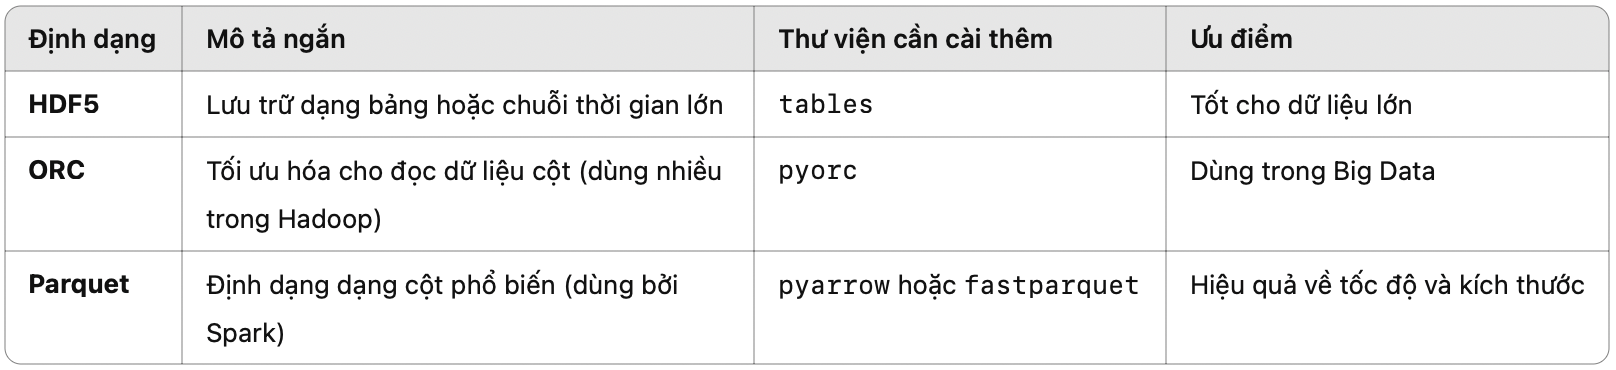

Ví dụ đọc file Parquet:

Cài thư viện phụ trợ:

In [121]:
%pip install pyarrow
# hoặc
# conda install pyarrow

DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/PyEyeTrack-1.0.1-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [122]:
fec = pd.read_parquet('datasets/fec/fec.parquet')
fec.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,None,None,None,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,None,None,None,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,None,None,None,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,None,None,None,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,None,None,None,SA17A,736166


**📚 Kết luận:**
- Dùng pickle thì tiện, nhưng **chỉ nên dùng ngắn hạn** và trong Python.
- Dùng Parquet, HDF5… sẽ tốt hơn cho **dữ liệu lớn, chia sẻ lâu dài**, hoặc làm việc với các **hệ thống khác nhau**.

#### **Reading Microsoft Excel Files**

 **✅ Cài đặt thư viện phụ trợ**

Pandas không đọc được Excel trực tiếp, nên bạn cần cài thêm:

In [123]:
# conda install openpyxl xlrd
# # hoặc dùng pip:
%pip install openpyxl xlrd

DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/PyEyeTrack-1.0.1-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


**✅ Đọc file Excel**

- **Cách 1: Dùng `pd.ExcelFile` – tốt khi đọc nhiều sheet**

In [124]:
import pandas as pd

xlsx = pd.ExcelFile("examples/ex1.xlsx")  # mở file Excel
print(xlsx.sheet_names)  # in danh sách tên sheet

df = xlsx.parse(sheet_name="Sheet1")  # đọc dữ liệu từ sheet
df.head()

['Sheet1']


,Unnamed: 0,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo


Nếu file có cột đầu tiên là chỉ số (index), dùng index_col=0:

In [125]:
df = xlsx.parse(sheet_name="Sheet1", index_col=0)
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


- **Cách 2: Dùng `pd.read_excel` – tiện và ngắn gọn hơn**

In [126]:
df = pd.read_excel("examples/ex1.xlsx", sheet_name="Sheet1")

Tương tự, bạn cũng có thể dùng index_col=0 nếu cần.

##### **💾 Ghi dữ liệu vào file Excel**

- **Cách 1: Dùng ExcelWriter (cách đầy đủ)**

In [127]:
writer = pd.ExcelWriter("examples/ex2.xlsx")
df.to_excel(writer, sheet_name="Sheet1")
with pd.ExcelWriter("examples/ex2.xlsx") as writer:
    df.to_excel(writer, sheet_name="Sheet1")

- **Cách 2: Đơn giản hơn – truyền trực tiếp đường dẫn**

In [128]:
df.to_excel("examples/ex2.xlsx", sheet_name="Sheet1")

#### **Using HDF5 Format**

##### **📦 HDF5 là gì?**

- HDF5 (Hierarchical Data Format version 5) là định dạng tệp dùng để lưu **dữ liệu lớn, dữ liệu mảng** có cấu trúc phức tạp, thường dùng trong khoa học và kỹ thuật.
- Hỗ trợ **lưu nhiều tập dữ liệu** trong 1 file, kèm metadata.
- Cho phép **truy cập nhanh**, đọc một phần của dữ liệu mà không cần tải toàn bộ vào RAM.
- Hỗ trợ **nén dữ liệu tự động** khi có mẫu lặp.

##### **🧰 Cài đặt thư viện cần thiết**

**Sử dụng conda:**

In [129]:
# conda install pytables

**Sử dụng pip:**

In [130]:
pip install tables

DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/PyEyeTrack-1.0.1-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


##### **🧪 Cách sử dụng HDF5 với pandas**

**Bước 1: Tạo dữ liệu**

In [131]:
import pandas as pd
import numpy as np

frame = pd.DataFrame({"a": np.random.standard_normal(100)})

**Bước 2: Ghi dữ liệu vào file HDF5**

In [132]:
store = pd.HDFStore("examples/mydata.h5")  # mở file HDF5

store["obj1"] = frame              # lưu cả DataFrame
store["obj1_col"] = frame["a"]     # lưu một cột

print(store)                       # hiển thị thông tin file

<class 'pandas.io.pytables.HDFStore'>
File path: examples/mydata.h5



**Bước 3: Đọc lại dữ liệu**

In [133]:
df = store["obj1"]
print(df.head())

          a
0 -0.025607
1  2.409170
2  0.411586
3 -0.229017
4  0.736729


**Bước 4: Ghi dữ liệu với hỗ trợ truy vấn (`format=“table”`)**

In [134]:
store.put("obj2", frame, format="table")  # ghi với định dạng cho phép truy vấn

# Truy vấn bằng điều kiện
subset = store.select("obj2", where=["index >= 10 and index <= 15"])
print(subset)

           a
10 -0.499135
11  0.100281
12 -1.865974
13  0.920501
14 -0.868635
15  0.510142


**Bước 5: Đóng file**

In [135]:
store.close()

##### **🚀 Lối tắt: Ghi và đọc bằng to_hdf và read_hdf**

In [136]:
# Ghi
frame.to_hdf("examples/mydata.h5", "obj3", format="table")

# Đọc với truy vấn
pd.read_hdf("examples/mydata.h5", "obj3", where=["index < 5"])

/var/folders/bg/hsvxykxj7yx0jz1nrhc3k6z40000gn/T/ipykernel_59748/2644752159.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  frame.to_hdf("examples/mydata.h5", "obj3", format="table")


,a
0,-0.025607
1,2.409170
2,0.411586
3,-0.229017
4,0.736729


##### **🧹 Xoá file HDF5**

In [137]:
import os
os.remove("examples/mydata.h5")

##### **⚠️ Lưu ý quan trọng:**

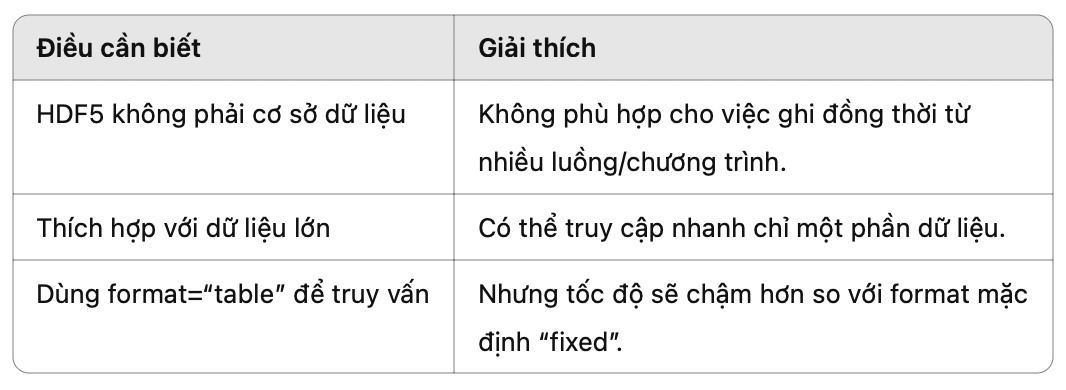

##### **✅ Khi nào nên dùng HDF5?**

- Khi bạn làm việc với **dữ liệu lớn, không thể chứa hết trong RAM**.
- Khi bạn cần **đọc nhanh nhiều lần nhưng ghi ít** (write-once, read-many).
- Khi bạn muốn **lưu trữ nhiều bảng/phân đoạn dữ liệu trong cùng một file**.

### **6.3 Interacting with Web APIs**

**Cài đặt thư viện requests:**

In [138]:
# conda install requests

In [139]:
pip install requests

DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/PyEyeTrack-1.0.1-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


**Gửi yêu cầu GET đến GitHub API:**

In [140]:
import requests

url = "https://api.github.com/repos/pandas-dev/pandas/issues"
resp = requests.get(url)
resp.raise_for_status()  # Kiểm tra lỗi HTTP

- raise_for_status() giúp kiểm tra xem có lỗi HTTP (như 404 hay 500) không.
- resp.status_code là 200 nghĩa là thành công.

**Chuyển đổi dữ liệu JSON thành đối tượng Python:**

In [141]:
data = resp.json()  # Chuyển JSON thành list/dict

**Trích xuất dữ liệu từ JSON vào DataFrame:**

In [142]:
import pandas as pd

issues = pd.DataFrame(data, columns=["number", "title", "labels", "state"])

In [143]:
issues.head()

,number,title,labels,state
0,61629,BUG: to_stata erroring when encoded text and n...,[],open
1,61628,BUG: PerformanceWarning when agg with pd.Named...,"[{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...",open
2,61627,BUG: the behavior of DataFrameGroupBy.apply(.....,"[{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...",open
3,61626,DOC: Pandas contributor take limit,"[{'id': 134699, 'node_id': 'MDU6TGFiZWwxMzQ2OT...",open
4,61625,[backport 2.3.x] BUG(string dtype): Empty sum ...,[],open


- data là một danh sách gồm các dict, mỗi dict là một issue trên GitHub.
- Các trường như number, title, labels, state được trích xuất để phân tích.

**Kết quả đầu ra mẫu:**

- Là một DataFrame có 4 cột chính: number, title, labels, state.
- Có thể chứa 30 dòng tương ứng với 30 issue mới nhất trên GitHub.

**Lưu ý thêm:**
- Dữ liệu JSON từ các API web rất linh hoạt, nhưng bạn cần hiểu cấu trúc JSON để trích xuất chính xác dữ liệu cần phân tích.
- API của GitHub có thể giới hạn số lần truy cập (rate limit), đặc biệt nếu không đăng nhập.

### **6.4 Interacting with Databases**

**✅ Kết nối SQLite và tạo bảng**

SQLite là hệ quản trị cơ sở dữ liệu nhẹ, tích hợp sẵn trong Python.

In [144]:
import sqlite3

# Câu lệnh SQL tạo bảng
query = """
CREATE TABLE test (
    a VARCHAR(20), 
    b VARCHAR(20), 
    c REAL, 
    d INTEGER
);
"""

# Tạo kết nối tới database file (nếu chưa có sẽ tự tạo)
con = sqlite3.connect("file_created/mydata.sqlite")

# Thực thi câu lệnh SQL
con.execute(query)
con.commit()

**✅ Thêm dữ liệu vào bảng**

In [145]:
data = [
    ("Atlanta", "Georgia", 1.25, 6),
    ("Tallahassee", "Florida", 2.6, 3),
    ("Sacramento", "California", 1.7, 5)
]

stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"
con.executemany(stmt, data)
con.commit()

- ? là placeholder để chèn dữ liệu vào câu lệnh SQL.

**✅ Truy vấn dữ liệu từ bảng**

In [146]:
cursor = con.execute("SELECT * FROM test")
rows = cursor.fetchall()
rows

[('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5)]

**✅ Lấy tên cột từ cursor.description**

In [147]:
column_names = [x[0] for x in cursor.description]
column_names

['a', 'b', 'c', 'd']

**✅ Đưa dữ liệu vào DataFrame**

In [148]:
import pandas as pd
df = pd.DataFrame(rows, columns=column_names)
print(df)

             a           b     c  d
0      Atlanta     Georgia  1.25  6
1  Tallahassee     Florida  2.60  3
2   Sacramento  California  1.70  5


##### **⚡️ Cách làm gọn hơn với SQLAlchemy + pandas**

Cài đặt SQLAlchemy:

In [149]:
# conda install sqlalchemy
# # hoặc
%pip install sqlalchemy

DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/PyEyeTrack-1.0.1-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Sử dụng SQLAlchemy để đọc trực tiếp vào pandas:

In [151]:
import sqlalchemy as sqla

# Kết nối với SQLite
db = sqla.create_engine("sqlite:///file_created/mydata.sqlite")

# Đọc dữ liệu từ SQL vào DataFrame
df = pd.read_sql("SELECT * FROM test", db)
print(df)

             a           b     c  d
0      Atlanta     Georgia  1.25  6
1  Tallahassee     Florida  2.60  3
2   Sacramento  California  1.70  5


##### **🔑 Lợi ích của dùng SQLAlchemy + pandas:**

- Không cần tạo cursor và gọi fetchall().
- Không cần thủ công lấy tên cột.
- Tương thích với nhiều loại cơ sở dữ liệu khác nhau (PostgreSQL, MySQL, …).